In [8]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

#pd.set_option('display.max_rows', 4000)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

'''
Author: Enrico Ceccolini
    TODO write the description
'''

datadir = "/datasets/eurora_data/db1/"
datadir = "/datasets/eurora_data/db/" #hdd
infile_jobs_to_nodes = datadir + "job_nodes.csv"
infile_nodes = datadir + "nodes.csv"

suffix = "_5sec_"
### select an interval from
## 1 settings wholeData
#interval_comment_whole = "WholeData"

### select an interval from
## 2 settings Andrea
interval_comment = "Andrea"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')
#infile_jobs = datadir + "april_long_jobs.csv"

## 3 settings Alina
interval_comment = "Alina"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-11-01')

infile_jobs = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_jobs_real_pow"

## notice that 43 doesn't exists in the db
#nodes=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
#nodes=['01'] # test

In [9]:
jobs_to_nodes_whole_data = pd.read_csv(infile_jobs_to_nodes, index_col=0)
print("jobs_to_nodes_whole_data contains {} records".format(jobs_to_nodes_whole_data.shape[0]))

long_jobs = pd.read_csv(infile_jobs + ".csv", index_col=0)
print("There are {} long jobs in the {}'s interval".format(long_jobs.shape[0], interval_comment))

jobs_to_nodes_whole_data contains 469095 records
There are 336787 long jobs in the Alina's interval


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
### merge the info from the two tables
merged_jobs_to_nodes = pd.merge(long_jobs, jobs_to_nodes_whole_data, how='left', on='job_id_string')
print("merged_jobs_to_nodes contains {} records".format(merged_jobs_to_nodes.shape[0]))

merged_jobs_to_nodes contains 25769 records


In [6]:
nodes = pd.read_csv(infile_nodes, index_col=0)
#print(nodes.shape[0])
#nodes.head()

In [7]:
# create the file where to calculate the approximated consumption
### part 1
infile_node = datadir + "CPUs/" + interval_comment + "/node01" + suffix + interval_comment + "_active_cores_and_jobs"
node_data = pd.read_csv(infile_node + ".csv")

all_time_interval_power_consumption = pd.DataFrame(node_data['timestamp'])
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_pred_" + interval_comment + "2.csv"
all_time_interval_power_consumption.to_csv(infile_validate_approx)


### part 2
#all_time_interval_power_consumption = pd.read_csv(infile_validate_approx, index_col=0)
#all_time_interval_power_consumption.shape

SystemError: <built-in method item of numpy.ndarray object at 0x7fa92eaf9df0> returned a result with an error set

In [25]:
node_cpy = nodes

In [26]:
#all_time_interval_power_consumption

nodes = nodes.tail(37)

In [28]:
import time
start_time = time.time()
# per ogni nodo sommo quanto è stato il consumo ad ogni intervallo in un vettore parallelo
# questo sia per il valore approssimato guardando i job
# sia per il valore reale
j = 0
for node_index, node_row in nodes.iterrows():
    node_id = node_row['node_id']
    if( int(node_id) < 10):
        node_id = "0" + str(node_id)
    else:
        node_id = str(node_id)
    print(node_id)
    node_core_idle = node_row['core_idle']
    
    if (node_id != "43"):
        total_real_power_consumption, total_approx_power_consumption = calculate_power_consumption(node_id, node_core_idle)
        all_time_interval_power_consumption[node_id + "_real"] = total_real_power_consumption
        all_time_interval_power_consumption[node_id + "_approx"] = total_approx_power_consumption
    
    j = j + 1
    if(j%8 == 0):
        all_time_interval_power_consumption.to_csv(infile_validate_approx)
    
    print("--- %s seconds ---" % (time.time() - start_time))
all_time_interval_power_consumption.to_csv(infile_validate_approx)
print("--- %s seconds ---" % (time.time() - start_time))

# time: 17603s

28
859


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 84.02105760574341 seconds ---
29
560


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 138.0898883342743 seconds ---
30
548


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 194.27091598510742 seconds ---
31
710


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 263.5733320713043 seconds ---
32
272


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 293.85430121421814 seconds ---
33
6801


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 876.20649766922 seconds ---
34
5474


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 1350.2195830345154 seconds ---
35
6395


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 2029.314868927002 seconds ---
36
2049


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 2208.3620269298553 seconds ---
37
3459


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 2510.232052564621 seconds ---
38
4115


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 2863.0296182632446 seconds ---
39
284


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 2896.8057777881622 seconds ---
40
3119


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 3172.2688965797424 seconds ---
41
3


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 3179.2502994537354 seconds ---
42
3936


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 3516.85182929039 seconds ---
43
--- 3766.847419977188 seconds ---
44
10984


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 4718.074863910675 seconds ---
45
24433


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 6778.8697555065155 seconds ---
46
4350


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 7151.067599534988 seconds ---
47
14289


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 8392.11291885376 seconds ---
48
3026


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 8658.88769698143 seconds ---
49
5292


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 9112.62535405159 seconds ---
50
3381


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 9415.247681617737 seconds ---
51
9616


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 10568.192713022232 seconds ---
52
900


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 10650.455174446106 seconds ---
53
15


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 10657.297417640686 seconds ---
54
951


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 10739.102274417877 seconds ---
55
16197


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 12039.102393865585 seconds ---
56
11965


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 12986.28277015686 seconds ---
57
3990


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 13312.31696486473 seconds ---
58
2903


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 13548.498273849487 seconds ---
59
8953


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 14738.357735157013 seconds ---
60
2644


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 14953.99686717987 seconds ---
61
4437


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 15308.04156422615 seconds ---
62
2989


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 15553.7896130085 seconds ---
63
4571


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 15922.661935329437 seconds ---
64
14160


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


--- 17043.274677991867 seconds ---
--- 17603.86662721634 seconds ---


In [8]:
#all_time_interval_power_consumption
node_data.shape

(3715201, 7)

In [27]:
def calculate_power_consumption(node_str, node_core_idle):
    
    #num_minutes = 535680 # number of minutes on the Andrea's interval
    #node_start_time = pd.to_datetime('2014-03-31 00:00:00')
    
    num_minutes = 3715201
    node_start_time = pd.to_datetime('2014-03-31 00:00:00')
    
    #total_approx_power_consumption = pd.Series(0, index=np.arange(num_minutes))
    #total_active_cores = pd.Series(0, index=np.arange(num_minutes))
    total_real_power_consumption = pd.Series(0, index=np.arange(num_minutes))
    
    jobs_to_node = merged_jobs_to_nodes[merged_jobs_to_nodes['node_id'] == int(node_str)]
    infile_node = datadir + "CPUs/" + interval_comment + "/node" + node_str + suffix + interval_comment + "_active_cores_and_jobs"
    node_data = pd.read_csv(infile_node + ".csv")
    #print("{}".format(node_data.shape[0]))
    #print("{}".format(jobs_to_node.shape[0]))

    #node_start_time = node_data.iloc[0]['timestamp']
    #num_minutes = node_data.shape[0]
    #power_consumption = pd.Series(0, index=np.arange(num_minutes))
    #active_cores = pd.Series(0, index=np.arange(num_minutes))
    #print("{}".format(node_start_time))
    
    power_consumption = pd.Series(0, index=np.arange(num_minutes))
    active_cores = pd.Series(0, index=np.arange(num_minutes))
    
    i = 0
    num_jobs = jobs_to_node.shape[0]
    print("{}".format(num_jobs))
    
    jobs_to_node['run_start_time'] = pd.to_datetime(jobs_to_node['run_start_time'])
    jobs_to_node['end_time'] = pd.to_datetime(jobs_to_node['end_time'])
    
    for job_index, job_row in jobs_to_node.iterrows():
        
        #print("{}/{}".format(i, num_jobs))
        i = i + 1
        job_start_time = job_row['run_start_time']
        job_end_time = job_row['end_time']
        job_cores = job_row['ncpus']
        job_cores_total = job_row['cpu_req']
        #job_gpus = row['ngpus']
        #job_mics = row['nmics']
        job_power_consumption = job_row['real_pow'] * (job_cores / job_cores_total) # real_pow contains the total, here we need only the node portion
        # print(job_power_consumption)

        before_minutes = int((job_start_time - node_start_time - np.timedelta64(5, 's')) / np.timedelta64(5, 's'))
        running_minutes = int((job_end_time - job_start_time) / np.timedelta64(5, 's'))
        after_minutes = num_minutes - running_minutes - before_minutes

        #print("{} - {} - {}".format(before_minutes, running_minutes, after_minutes))
        before_serie = pd.Series(0, index=np.arange(before_minutes))
        running_serie = pd.Series(job_power_consumption, index=np.arange(running_minutes))
        after_serie = pd.Series(0, index=np.arange(after_minutes))
        concat_series = pd.concat([before_serie, running_serie, after_serie], ignore_index=True)
        power_consumption = power_consumption.add(concat_series, fill_value=0)

        running_serie = pd.Series(job_cores, index=np.arange(running_minutes))
        concat_series = pd.concat([before_serie, running_serie, after_serie], ignore_index=True)
        active_cores = active_cores.add(concat_series, fill_value=0)

        
    for x in range(0, 17):
        # active_cores[active_cores == x] += (node_core_idle * 16) * (16 - x) / 16
        active_cores[active_cores == x] += node_core_idle * (16 - x)
    
    power_consumption = power_consumption.add(active_cores, fill_value=0)
        
    indices = node_data['active_cores'] == 0
    node_data.at[indices, 'pow_tot'] = node_core_idle * 16
    total_real_power_consumption = node_data['pow_tot']
    
    return total_real_power_consumption, power_consumption

recover from file

In [2]:
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + ".csv"
data = pd.read_csv(infile_validate_approx , index_col=0)


/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.shape[0]

3715201

In [6]:
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + "2.csv"
data2 = pd.read_csv(infile_validate_approx , index_col=0)
data2 = data2.drop(['timestamp'], axis=1)

In [5]:
data2.shape[0]

3715201

In [8]:
all_time_interval_power_consumption = pd.concat([data, data2], axis=1)
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + ".csv"
all_time_interval_power_consumption.to_csv(infile_validate_approx)

In [7]:
#all_time_interval_power_consumption

In [8]:
#all_time_interval_power_consumption = all_time_interval_power_consumption.drop(['timestamp'], axis=1)

In [33]:
#all_time_interval_power_consumption

,01_real,01_approx,02_real,02_approx,03_real,03_approx,04_real,04_approx,05_real,05_approx,06_real,06_approx,07_real,07_approx,08_real,08_approx,09_real,09_approx,10_real,10_approx,11_real,11_approx,12_real,12_approx,13_real,13_approx,14_real,14_approx,15_real,15_approx,16_real,16_approx,17_real,17_approx,18_real,18_approx,19_real,19_approx,20_real,20_approx,21_real,21_approx,22_real,22_approx,23_real,23_approx,24_real,24_approx,25_real,25_approx,26_real,26_approx,27_real,27_approx,28_real,28_approx,29_real,29_approx,30_real,30_approx,31_real,31_approx,32_real,32_approx,33_real,33_approx,34_real,34_approx,35_real,35_approx,36_real,36_approx,37_real,37_approx,38_real,38_approx,39_real,39_approx,40_real,40_approx,41_real,41_approx,42_real,42_approx,44_real,44_approx,45_real,45_approx,46_real,46_approx,47_real,47_approx,48_real,48_approx,49_real,49_approx,50_real,50_approx,51_real,51_approx,52_real,52_approx,53_real,53_approx,54_real,54_approx,55_real,55_approx,56_real,56_approx,57_real,57_approx,58_real,58_approx,59_real,59_approx,60_real,60_approx,61_real,61_approx,62_real,62_approx,63_real,63_approx,64_real,64_approx
0,51.829711,51.829711,52.545694,52.545694,55.334445,55.334445,54.319729,54.319729,54.601864,54.601864,55.545083,55.545083,55.553777,55.553777,52.934436,52.934436,54.078703,54.078703,54.063427,54.063427,54.037452,54.037452,52.976916,52.976916,54.609398,54.609398,52.843283,52.843283,52.121038,52.121038,52.458921,52.458921,52.445245,52.445245,52.988523,52.988523,53.666674,53.666674,55.155633,55.155633,53.889833,53.889833,50.397628,50.397628,53.67468,53.67468,53.112492,53.112492,53.17243,53.17243,54.213069,54.213069,55.409841,55.409841,54.844424,54.844424,54.776646,54.776646,53.373794,53.373794,54.144314,54.144314,53.20914,53.20914,55.166877,55.166877,54.577176,54.577176,62.365089,62.365089,51.737469,51.737469,56.937321,56.937321,58.404657,58.404657,52.539192,52.539192,60.397505,60.397505,52.422106,52.422106,55.391187,55.391187,63.017013,63.017013,58.913121,58.913121,60.646604,60.646604,60.922464,60.922464,57.432165,57.432165,57.673794,57.673794,56.947839,56.947839,63.595858,63.595858,53.748298,53.748298,54.034681,54.034681,53.236193,53.236193,63.602113,63.602113,57.650437,57.650437,57.954377,57.954377,56.184788,56.184788,57.736858,57.736858,56.300235,56.300235,58.469255,58.469255,57.131946,57.131946,57.212285,57.212285,59.787256,59.787256
1,51.829711,51.829711,52.545694,52.545694,55.334445,55.334445,54.319729,54.319729,54.601864,54.601864,55.545083,55.545083,55.553777,55.553777,52.934436,52.934436,54.078703,54.078703,54.063427,54.063427,54.037452,54.037452,52.976916,52.976916,54.609398,54.609398,52.843283,52.843283,52.121038,52.121038,52.458921,52.458921,52.445245,52.445245,52.988523,52.988523,53.666674,53.666674,55.155633,55.155633,53.889833,53.889833,50.397628,50.397628,53.67468,53.67468,53.112492,53.112492,53.17243,53.17243,54.213069,54.213069,55.409841,55.409841,54.844424,54.844424,54.776646,54.776646,53.373794,53.373794,54.144314,54.144314,53.20914,53.20914,55.166877,55.166877,54.577176,54.577176,62.365089,62.365089,51.737469,51.737469,56.937321,56.937321,58.404657,58.404657,52.539192,52.539192,60.397505,60.397505,52.422106,52.422106,55.391187,55.391187,63.017013,63.017013,58.913121,58.913121,60.646604,60.646604,60.922464,60.922464,57.432165,57.432165,57.673794,57.673794,56.947839,56.947839,63.595858,63.595858,53.748298,53.748298,54.034681,54.034681,53.236193,53.236193,63.602113,63.602113,57.650437,57.650437,57.954377,57.954377,56.184788,56.184788,57.736858,57.736858,56.300235,56.300235,58.469255,58.469255,57.131946,57.131946,57.212285,57.212285,59.787256,59.787256
2,51.829711,51.829711,52.545694,52.545694,55.334445,55.334445,54.319729,54.319729,54.601864,54.601864,55.545083,55.545083,55.553777,55.553777,52.934436,52.934436,54.078703,54.078703,54.063427,54.063427,54.037452,54.037452,52.976916,52.976916,54.609398,54.609398,52.843283,52.843283,52.121038,52.121038,52.458921,52.458921,52.445245,52.445245,52.988523,5

In [11]:
#all_time_interval_power_consumption = all_time_interval_power_consumption[pd.to_datetime(all_time_interval_power_consumption['timestamp']) >= pd.to_datetime('2014-03-31 11:21:00')]
#all_time_interval_power_consumption = all_time_interval_power_consumption[pd.to_datetime(all_time_interval_power_consumption['timestamp']) <= pd.to_datetime('2014-04-30 20:32:00')]

In [49]:
all_time_interval_power_consumption = all_time_interval_power_consumption.fillna(55.52)

In [31]:
all_time_interval_power_consumption[all_time_interval_power_consumption.index.duplicated()]

,timestamp,01_real,01_approx,02_real,02_approx,03_real,03_approx,04_real,04_approx,05_real,05_approx,06_real,06_approx,07_real,07_approx,08_real,08_approx,09_real,09_approx,10_real,10_approx,11_real,11_approx,12_real,12_approx,13_real,13_approx,14_real,14_approx,15_real,15_approx,16_real,16_approx,17_real,17_approx,18_real,18_approx,19_real,19_approx,20_real,20_approx,21_real,21_approx,22_real,22_approx,23_real,23_approx,24_real,24_approx,25_real,25_approx,26_real,26_approx,27_real,27_approx,timestamp,28_real,28_approx,29_real,29_approx,30_real,30_approx,31_real,31_approx,32_real,32_approx,33_real,33_approx,34_real,34_approx,35_real,35_approx,36_real,36_approx,37_real,37_approx,38_real,38_approx,39_real,39_approx,40_real,40_approx,41_real,41_approx,42_real,42_approx,44_real,44_approx,45_real,45_approx,46_real,46_approx,47_real,47_approx,48_real,48_approx,49_real,49_approx,50_real,50_approx,51_real,51_approx,52_real,52_approx,53_real,53_approx,54_real,54_approx,55_real,55_approx,56_real,56_approx,57_real,57_approx,58_real,58_approx,59_real,59_approx,60_real,60_approx,61_real,61_approx,62_real,62_approx,63_real,63_approx,64_real,64_approx


In [50]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


In [51]:
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


In [52]:
real['Total']= real.iloc[:, -63:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -63:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

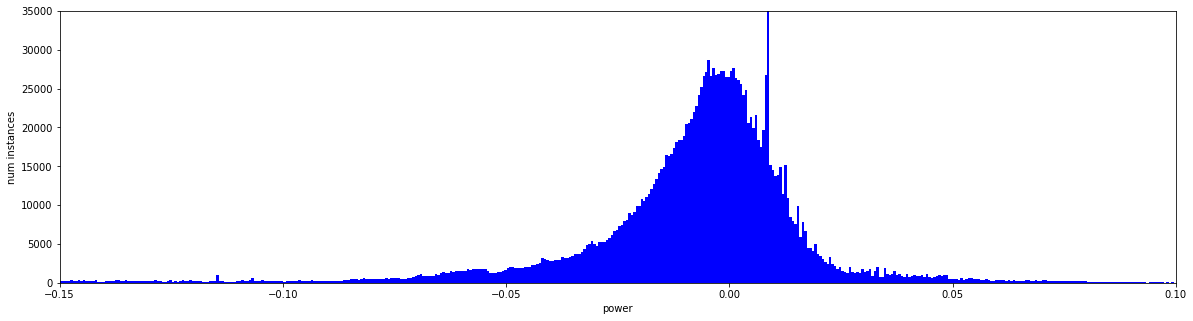

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

num_bins = 1800
n, bins, patches = plt.hist(differences_norm, num_bins, facecolor='blue', alpha=1)
plt.axis([-0.15, 0.1, 0, 35000])
plt.xlabel("power")
plt.ylabel("num instances")
plt.show()

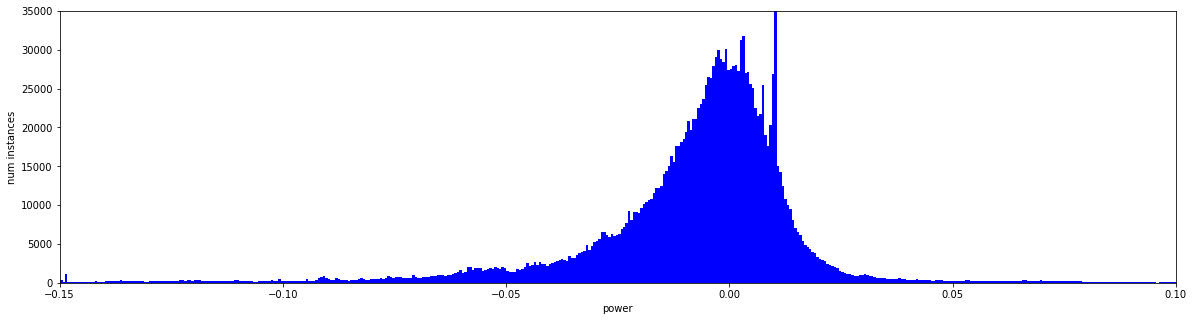

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

num_bins = 1800
n, bins, patches = plt.hist(differences_norm, num_bins, facecolor='blue', alpha=1)
plt.axis([-0.15, 0.1, 0, 35000])
plt.xlabel("power")
plt.ylabel("num instances")
plt.show()

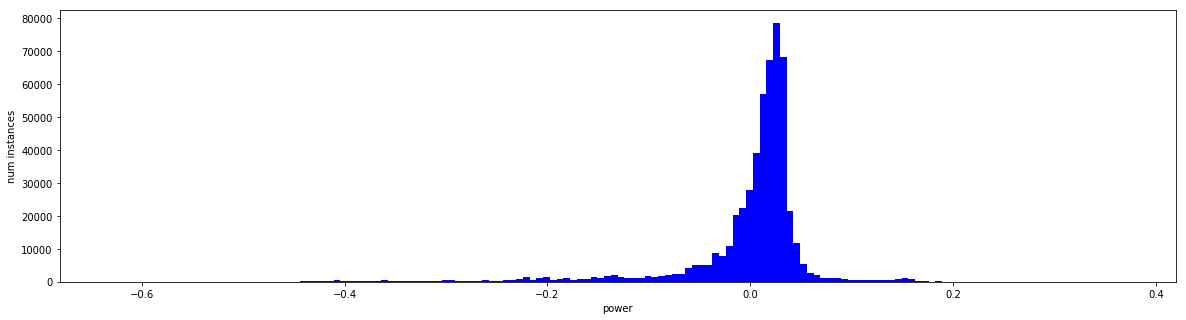

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (20,5)

num_bins = 150
n, bins, patches = plt.hist(differences_norm, num_bins, facecolor='blue', alpha=1)
#plt.axis([-0.4, 0.4, 0, 600])
plt.xlabel("power")
plt.ylabel("num instances")
plt.show()